In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Control Display of seabon
pd.options.display.max_columns=50
#sns.set(style="darkgrid", rc={"axes.facecolor":"#CAFlDE"})

In [4]:
df = pd.read_csv('bse_dataset.csv')
df

,Timestamp,What is your gender?,Age,What is your emotion?,Year of birth,What is your CGPA?,Do you have a Girl Friend or BOY Friend,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you have seek any specialist for a treatment?
0,05/07/2023 09:38:39,Male,21,Content,2002,4.22,No,No,Yes,Yes,Yes
1,05/07/2023 09:38:57,Marabou stock,45,Weird,2100,8.9,Yes,Yes,Yes,Yes,No
2,05/07/2023 09:39:09,Female,20,Happy,2002,3.98,No,No,Yes,Yes,No
3,05/07/2023 09:39:12,Male,21,Happy,2003,4.37,No,No,No,No,Nope
4,05/07/2023 09:39:14,Female,21,Happy,2002,3.63,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
92,05/07/2023 09:53:56,Female,68,Sad,1953,4.8,No,Yes,Yes,Yes,Yes
93,05/07/2023 09:54:13,Male,29,Hopeful,1994,I don't know yet,"Sure, multiple girlfriends",No,No,No,No
94,05/07/2023 09:54:28,Male,22,Fighting poverty,2001,3.12,Girl friends are thieves,Yes,Yes,No,No
95,05/07/2023 09:54:36,Male,23,good and bad,2000,3.5,Namiiro Zahara Bidin,No,No,No,No


In [13]:
df.shape

(97, 11)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 11 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Timestamp                                           97 non-null     object
 1   What is your gender?                                97 non-null     object
 2   Age                                                 97 non-null     int64 
 3   What is your emotion?                               96 non-null     object
 4   Year of birth                                       97 non-null     object
 5   What is your CGPA?                                  97 non-null     object
 6   Do you have a Girl Friend or BOY Friend             97 non-null     object
 7   Do you have Depression?                             97 non-null     object
 8   Do you have Anxiety?                                97 non-null     object
 9   Do you have 

In [18]:
# Check for null values
df.isnull().sum().sort_values(ascending=False)

What is your emotion?                                 1
Timestamp                                             0
What is your gender?                                  0
Age                                                   0
Year of birth                                         0
What is your CGPA?                                    0
Do you have a Girl Friend or BOY Friend               0
Do you have Depression?                               0
Do you have Anxiety?                                  0
Do you have Panic attack?                             0
Did you have seek any specialist for a treatment?     0
dtype: int64

In [19]:
df.dtypes

Timestamp                                             object
What is your gender?                                  object
Age                                                    int64
What is your emotion?                                 object
Year of birth                                         object
What is your CGPA?                                    object
Do you have a Girl Friend or BOY Friend               object
Do you have Depression?                               object
Do you have Anxiety?                                  object
Do you have Panic attack?                             object
Did you have seek any specialist for a treatment?     object
dtype: object

In [17]:
# check null values in percentage
for i in df.columns:
    if df[i].isnull().any():
        print(i, "---------", df[i].isnull().sum()*100/df.shape[0], '%')

What is your emotion? --------- 1.0309278350515463 %


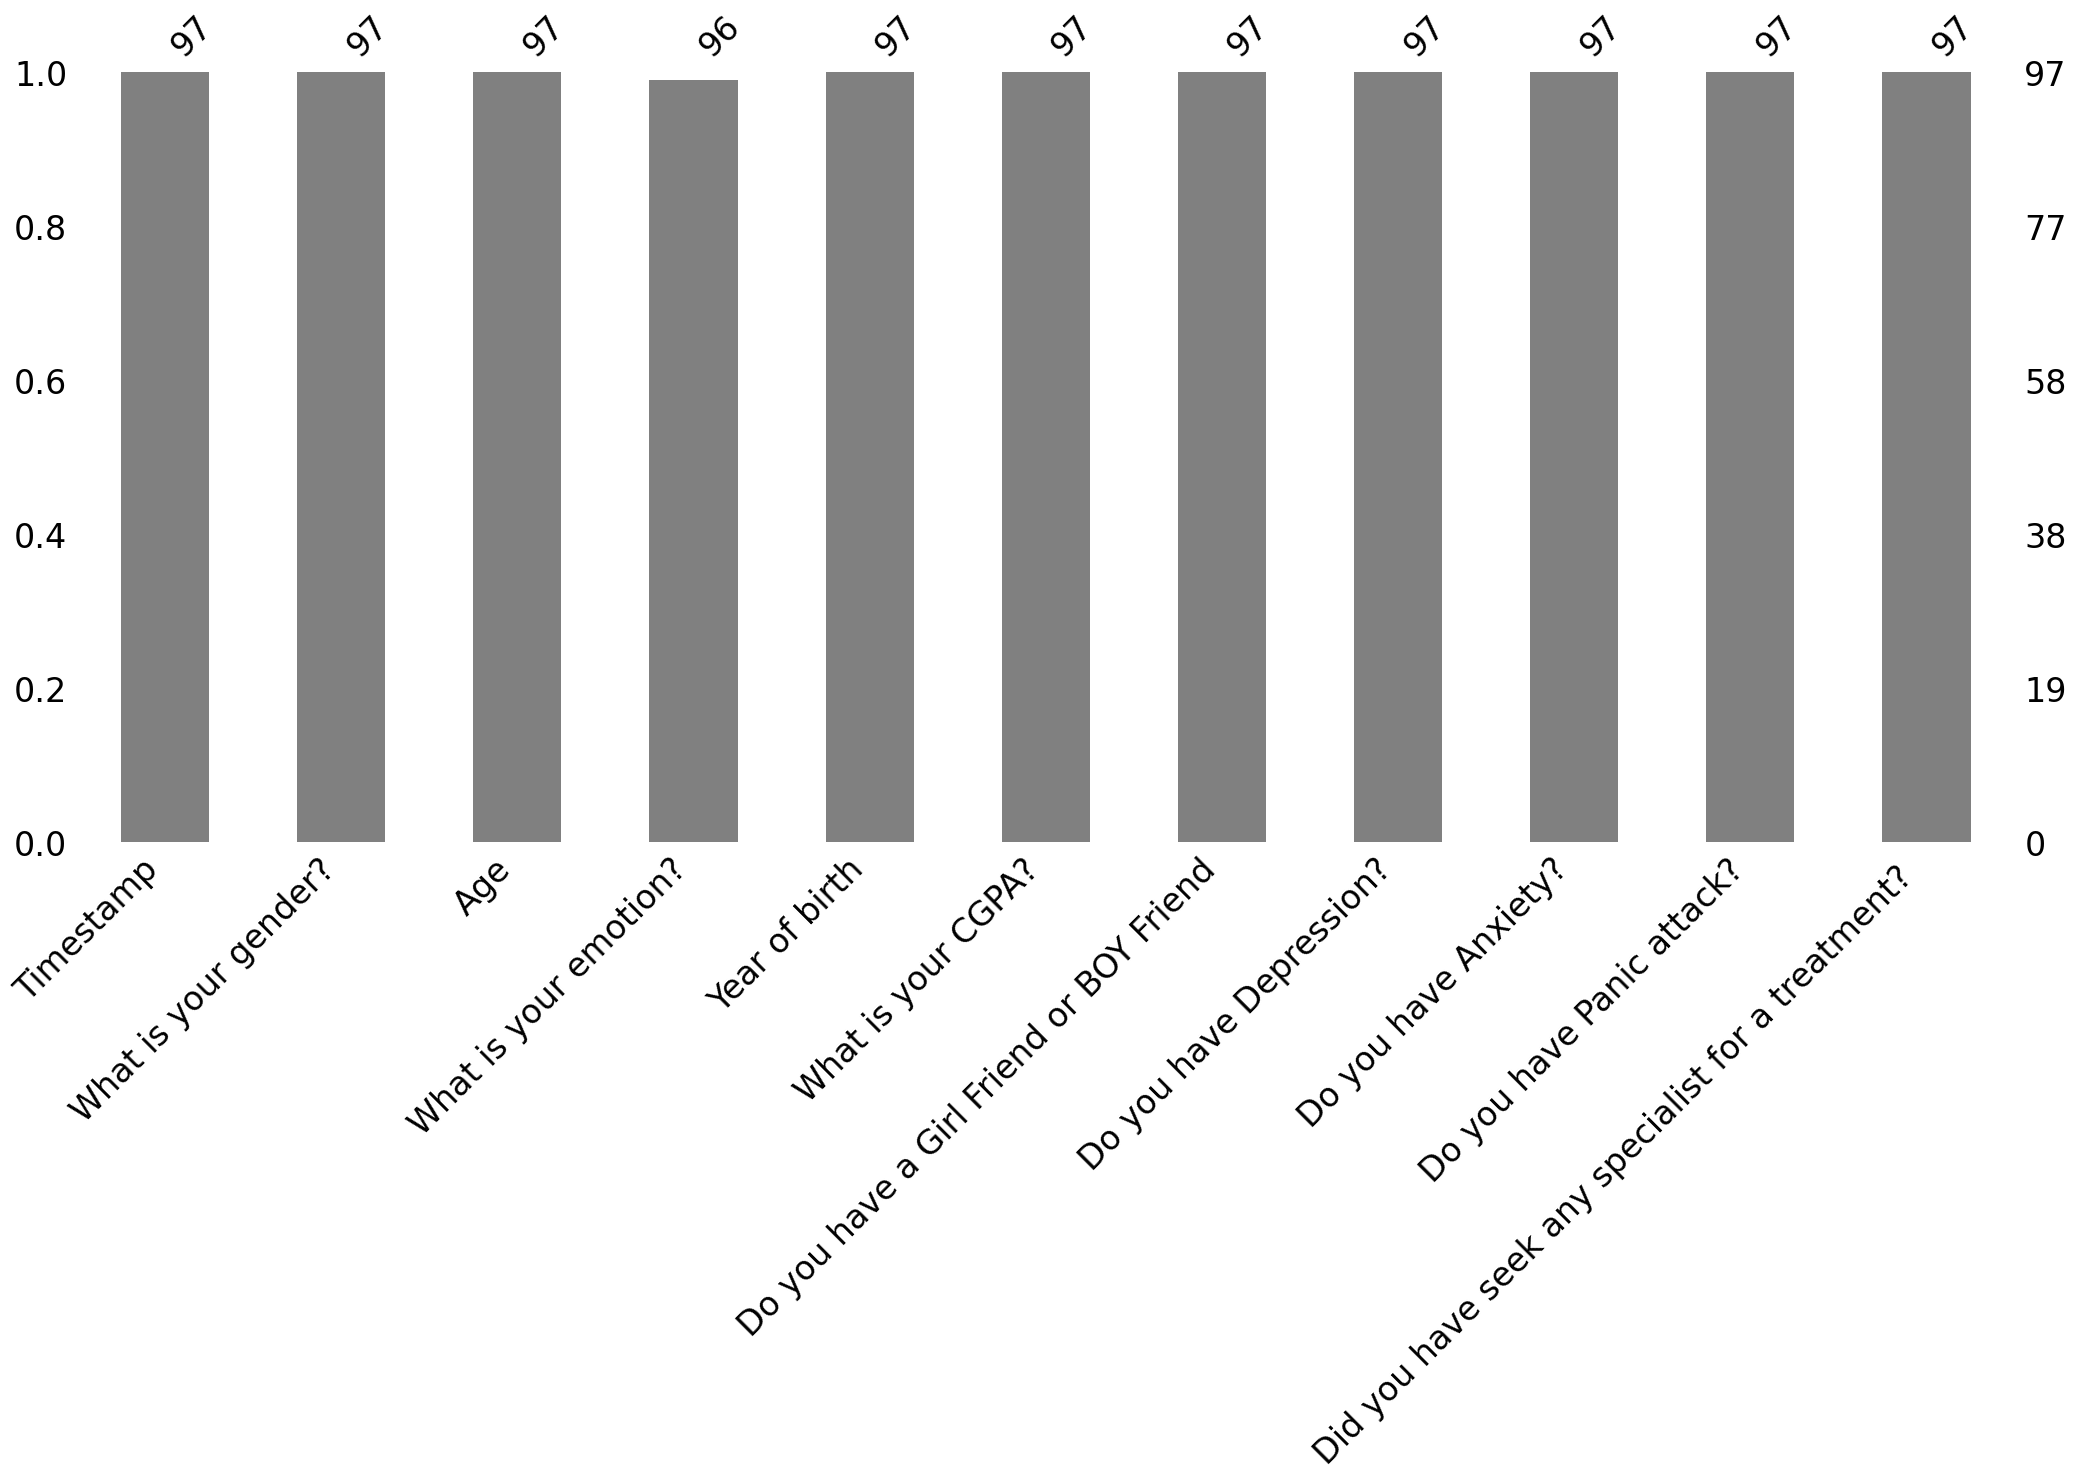

In [5]:
# Checking null values in figures
import missingno as msno
msno.bar(df, color='gray', fontsize=24);

In [21]:
# Checking for duplicates
df.duplicated().sum()

0

In [22]:
# Describe() statistical details about your data
# T is for Transpose
df.describe(include='object').T

,count,unique,top,freq
Timestamp,97,90,05/07/2023 09:40:42,2
What is your gender?,97,10,Male,41
What is your emotion?,96,50,Happy,16
Year of birth,97,18,2002,36
What is your CGPA?,97,61,3.5,7
Do you have a Girl Friend or BOY Friend,97,14,No,37
Do you have Depression?,97,13,No,47
Do you have Anxiety?,97,18,No,38
Do you have Panic attack?,97,13,No,43
Did you have seek any specialist for a treatment?,97,9,No,44


In [12]:
# Checking for unique values
for i in df.columns:
    print(i, '--------',df[i].unique())

Timestamp -------- ['05/07/2023 09:38:39' '05/07/2023 09:38:57' '05/07/2023 09:39:09'
 '05/07/2023 09:39:12' '05/07/2023 09:39:14' '05/07/2023 09:39:20'
 '05/07/2023 09:39:21' '05/07/2023 09:39:23' '05/07/2023 09:39:26'
 '05/07/2023 09:39:27' '05/07/2023 09:39:28' '05/07/2023 09:39:33'
 '05/07/2023 09:39:38' '05/07/2023 09:39:40' '05/07/2023 09:39:45'
 '05/07/2023 09:39:46' '05/07/2023 09:39:47' '05/07/2023 09:39:49'
 '05/07/2023 09:39:50' '05/07/2023 09:39:54' '05/07/2023 09:39:56'
 '05/07/2023 09:40:00' '05/07/2023 09:40:01' '05/07/2023 09:40:02'
 '05/07/2023 09:40:08' '05/07/2023 09:40:10' '05/07/2023 09:40:12'
 '05/07/2023 09:40:13' '05/07/2023 09:40:16' '05/07/2023 09:40:25'
 '05/07/2023 09:40:26' '05/07/2023 09:40:27' '05/07/2023 09:40:33'
 '05/07/2023 09:40:34' '05/07/2023 09:40:40' '05/07/2023 09:40:42'
 '05/07/2023 09:40:46' '05/07/2023 09:40:47' '05/07/2023 09:40:54'
 '05/07/2023 09:40:59' '05/07/2023 09:41:00' '05/07/2023 09:41:01'
 '05/07/2023 09:41:05' '05/07/2023 09:41:06

In [35]:
# loading the dataset
df4 = pd.read_csv('bse_dataset4.csv')
df4


,Timestamp,gender,Age,emotion,YOB,CGPA,Do you have a Girl Friend or BOY Friend,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you have seek any specialist for a treatment?,Duration,Pulse,Maxpulse,Calories
0,05/07/2023 09:38:39,Male,21.0,Content,2002,4.22,No,No,Yes,Yes,Yes,60,110,130,409.1
1,05/07/2023 09:38:57,Marabou stock,45.0,Weird,2100,8.9,Yes,Yes,Yes,Yes,No,60,117,145,479.0
2,05/07/2023 09:39:09,Female,20.0,Happy,2002,3.98,No,No,Yes,Yes,No,60,103,135,340.0
3,05/07/2023 09:39:12,Male,21.0,Happy,2003,4.37,No,No,No,No,Nope,45,109,175,282.4
4,05/07/2023 09:39:14,Female,21.0,Happy,2002,3.63,No,No,No,No,No,45,117,148,406.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,05/07/2023 09:44:09,Male,22.0,Angry,1999,3.5,Yes,No,No,No,No,60,105,140,290.8
165,05/07/2023 09:44:14,male,23.0,sad,1999,4,no,no,no,no,no,60,110,145,300.0
166,05/07/2023 09:44:15,male,20.0,calm,2002,3.7,yes,no,no,no,no,60,115,145,310.2
167,05/07/2023 09:44:35,Female,21.0,sad,2001,3.8,no,no,yes,no,no,75,120,150,320.4


In [24]:
# Confirm data shape
df4.shape

(169, 15)

In [25]:
df4.columns

Index(['Timestamp', 'gender', 'Age', 'emotion', 'YOB', 'CGPA',
       'Do you have a Girl Friend or BOY Friend', 'Do you have Depression?',
       'Do you have Anxiety?', 'Do you have Panic attack?',
       'Did you have seek any specialist for a treatment? ', 'Duration',
       'Pulse', 'Maxpulse', 'Calories'],
      dtype='object')

In [26]:
df4_new = df4.dropna()
df4_new

,Timestamp,gender,Age,emotion,YOB,CGPA,Do you have a Girl Friend or BOY Friend,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you have seek any specialist for a treatment?,Duration,Pulse,Maxpulse,Calories
0,05/07/2023 09:38:39,Male,21.0,Content,2002,4.22,No,No,Yes,Yes,Yes,60,110,130,409.1
1,05/07/2023 09:38:57,Marabou stock,45.0,Weird,2100,8.9,Yes,Yes,Yes,Yes,No,60,117,145,479.0
2,05/07/2023 09:39:09,Female,20.0,Happy,2002,3.98,No,No,Yes,Yes,No,60,103,135,340.0
3,05/07/2023 09:39:12,Male,21.0,Happy,2003,4.37,No,No,No,No,Nope,45,109,175,282.4
4,05/07/2023 09:39:14,Female,21.0,Happy,2002,3.63,No,No,No,No,No,45,117,148,406.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,05/07/2023 09:44:09,Male,22.0,Angry,1999,3.5,Yes,No,No,No,No,60,105,140,290.8
165,05/07/2023 09:44:14,male,23.0,sad,1999,4,no,no,no,no,no,60,110,145,300.0
166,05/07/2023 09:44:15,male,20.0,calm,2002,3.7,yes,no,no,no,no,60,115,145,310.2
167,05/07/2023 09:44:35,Female,21.0,sad,2001,3.8,no,no,yes,no,no,75,120,150,320.4


In [36]:
df4.fillna(value=100, inplace=True)
df4

,Timestamp,gender,Age,emotion,YOB,CGPA,Do you have a Girl Friend or BOY Friend,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you have seek any specialist for a treatment?,Duration,Pulse,Maxpulse,Calories
0,05/07/2023 09:38:39,Male,21.0,Content,2002,4.22,No,No,Yes,Yes,Yes,60,110,130,409.1
1,05/07/2023 09:38:57,Marabou stock,45.0,Weird,2100,8.9,Yes,Yes,Yes,Yes,No,60,117,145,479.0
2,05/07/2023 09:39:09,Female,20.0,Happy,2002,3.98,No,No,Yes,Yes,No,60,103,135,340.0
3,05/07/2023 09:39:12,Male,21.0,Happy,2003,4.37,No,No,No,No,Nope,45,109,175,282.4
4,05/07/2023 09:39:14,Female,21.0,Happy,2002,3.63,No,No,No,No,No,45,117,148,406.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,05/07/2023 09:44:09,Male,22.0,Angry,1999,3.5,Yes,No,No,No,No,60,105,140,290.8
165,05/07/2023 09:44:14,male,23.0,sad,1999,4,no,no,no,no,no,60,110,145,300.0
166,05/07/2023 09:44:15,male,20.0,calm,2002,3.7,yes,no,no,no,no,60,115,145,310.2
167,05/07/2023 09:44:35,Female,21.0,sad,2001,3.8,no,no,yes,no,no,75,120,150,320.4


In [37]:
df4['Calories'].fillna(100, inplace=True)
df4

,Timestamp,gender,Age,emotion,YOB,CGPA,Do you have a Girl Friend or BOY Friend,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you have seek any specialist for a treatment?,Duration,Pulse,Maxpulse,Calories
0,05/07/2023 09:38:39,Male,21.0,Content,2002,4.22,No,No,Yes,Yes,Yes,60,110,130,409.1
1,05/07/2023 09:38:57,Marabou stock,45.0,Weird,2100,8.9,Yes,Yes,Yes,Yes,No,60,117,145,479.0
2,05/07/2023 09:39:09,Female,20.0,Happy,2002,3.98,No,No,Yes,Yes,No,60,103,135,340.0
3,05/07/2023 09:39:12,Male,21.0,Happy,2003,4.37,No,No,No,No,Nope,45,109,175,282.4
4,05/07/2023 09:39:14,Female,21.0,Happy,2002,3.63,No,No,No,No,No,45,117,148,406.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,05/07/2023 09:44:09,Male,22.0,Angry,1999,3.5,Yes,No,No,No,No,60,105,140,290.8
165,05/07/2023 09:44:14,male,23.0,sad,1999,4,no,no,no,no,no,60,110,145,300.0
166,05/07/2023 09:44:15,male,20.0,calm,2002,3.7,yes,no,no,no,no,60,115,145,310.2
167,05/07/2023 09:44:35,Female,21.0,sad,2001,3.8,no,no,yes,no,no,75,120,150,320.4


In [38]:
print(df4.to_string())

               Timestamp         gender    Age               emotion            YOB              CGPA Do you have a Girl Friend or BOY Friend Do you have Depression? Do you have Anxiety? Do you have Panic attack? Did you have seek any specialist for a treatment?   Duration  Pulse  Maxpulse  Calories
0    05/07/2023 09:38:39           Male   21.0               Content           2002              4.22                                      No                      No                  Yes                       Yes                                                Yes        60    110       130     409.1
1    05/07/2023 09:38:57  Marabou stock   45.0                 Weird           2100               8.9                                     Yes                     Yes                  Yes                       Yes                                                 No        60    117       145     479.0
2    05/07/2023 09:39:09        Female    20.0                 Happy           2002              

In [43]:
# Replace using Mean, Median, Mode
# Calculate Mean
m = df4['Calories'].mean()
print(m)
df4['Calories'].fillna(m, inplace=True)

367.7390532544379


In [44]:
# Set the option to display all rows
pd.set_option('display.max_rows', None)

In [46]:
df4

,Timestamp,gender,Age,emotion,YOB,CGPA,Do you have a Girl Friend or BOY Friend,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you have seek any specialist for a treatment?,Duration,Pulse,Maxpulse,Calories
0,05/07/2023 09:38:39,Male,21.0,Content,2002,4.22,No,No,Yes,Yes,Yes,60,110,130,409.1
1,05/07/2023 09:38:57,Marabou stock,45.0,Weird,2100,8.9,Yes,Yes,Yes,Yes,No,60,117,145,479.0
2,05/07/2023 09:39:09,Female,20.0,Happy,2002,3.98,No,No,Yes,Yes,No,60,103,135,340.0
3,05/07/2023 09:39:12,Male,21.0,Happy,2003,4.37,No,No,No,No,Nope,45,109,175,282.4
4,05/07/2023 09:39:14,Female,21.0,Happy,2002,3.63,No,No,No,No,No,45,117,148,406.0
5,100,Female,23.0,Happy,2000,3.8,No,No,No,No,No,60,102,127,300.0
6,05/07/2023 09:39:21,female,21.0,irritated,2001,3.88,no,no,no,yes,yes,60,110,136,374.0
7,05/07/2023 09:39:23,Female,22.0,In a state of wonder,2001,3.79,No,No,No,No,Nope,45,104,134,253.3
8,05/07/2023 09:39:26,Male,22.0,Sad,2001,4.7,Yes,Yes,No,No,No,30,109,133,195.1
9,05/07/2023 09:39:27,Female,20.0,happy,2002,4,No,No,No,Yes,YES,60,98,124,269.0


In [45]:
print(df4.to_string())

               Timestamp         gender    Age               emotion            YOB              CGPA Do you have a Girl Friend or BOY Friend Do you have Depression? Do you have Anxiety? Do you have Panic attack? Did you have seek any specialist for a treatment?   Duration  Pulse  Maxpulse  Calories
0    05/07/2023 09:38:39           Male   21.0               Content           2002              4.22                                      No                      No                  Yes                       Yes                                                Yes        60    110       130     409.1
1    05/07/2023 09:38:57  Marabou stock   45.0                 Weird           2100               8.9                                     Yes                     Yes                  Yes                       Yes                                                 No        60    117       145     479.0
2    05/07/2023 09:39:09        Female    20.0                 Happy           2002              

In [48]:
# Empty cells , Wrong data, Wrong formats , Duplicate (Core of data Preparation and Presentation)
# Calculate Median
df4 = pd.read_csv('bse_dataset4.csv')
med = df4['Calories'].median()
print(med)
df4["Calories"].fillna(med, inplace=True)


318.6


In [49]:
df4

,Timestamp,gender,Age,emotion,YOB,CGPA,Do you have a Girl Friend or BOY Friend,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you have seek any specialist for a treatment?,Duration,Pulse,Maxpulse,Calories
0,05/07/2023 09:38:39,Male,21.0,Content,2002,4.22,No,No,Yes,Yes,Yes,60,110,130,409.1
1,05/07/2023 09:38:57,Marabou stock,45.0,Weird,2100,8.9,Yes,Yes,Yes,Yes,No,60,117,145,479.0
2,05/07/2023 09:39:09,Female,20.0,Happy,2002,3.98,No,No,Yes,Yes,No,60,103,135,340.0
3,05/07/2023 09:39:12,Male,21.0,Happy,2003,4.37,No,No,No,No,Nope,45,109,175,282.4
4,05/07/2023 09:39:14,Female,21.0,Happy,2002,3.63,No,No,No,No,No,45,117,148,406.0
5,NaN,Female,23.0,Happy,2000,3.8,No,No,No,No,No,60,102,127,300.0
6,05/07/2023 09:39:21,female,21.0,irritated,2001,3.88,no,no,no,yes,yes,60,110,136,374.0
7,05/07/2023 09:39:23,Female,22.0,In a state of wonder,2001,3.79,No,No,No,No,Nope,45,104,134,253.3
8,05/07/2023 09:39:26,Male,22.0,Sad,2001,4.7,Yes,Yes,No,No,No,30,109,133,195.1
9,05/07/2023 09:39:27,Female,20.0,happy,2002,4,No,No,No,Yes,YES,60,98,124,269.0


In [53]:
# Exercise 1
# Calculate mode on Age
df4 = pd.read_csv('bse_dataset4.csv')
modal_age = df['Age'].mode()[0]
print(modal_age)
df4["Age"].fillna(modal_age, inplace=True)

21


In [54]:
df4

,Timestamp,gender,Age,emotion,YOB,CGPA,Do you have a Girl Friend or BOY Friend,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you have seek any specialist for a treatment?,Duration,Pulse,Maxpulse,Calories
0,05/07/2023 09:38:39,Male,21.0,Content,2002,4.22,No,No,Yes,Yes,Yes,60,110,130,409.1
1,05/07/2023 09:38:57,Marabou stock,45.0,Weird,2100,8.9,Yes,Yes,Yes,Yes,No,60,117,145,479.0
2,05/07/2023 09:39:09,Female,20.0,Happy,2002,3.98,No,No,Yes,Yes,No,60,103,135,340.0
3,05/07/2023 09:39:12,Male,21.0,Happy,2003,4.37,No,No,No,No,Nope,45,109,175,282.4
4,05/07/2023 09:39:14,Female,21.0,Happy,2002,3.63,No,No,No,No,No,45,117,148,406.0
5,NaN,Female,23.0,Happy,2000,3.8,No,No,No,No,No,60,102,127,300.0
6,05/07/2023 09:39:21,female,21.0,irritated,2001,3.88,no,no,no,yes,yes,60,110,136,374.0
7,05/07/2023 09:39:23,Female,22.0,In a state of wonder,2001,3.79,No,No,No,No,Nope,45,104,134,253.3
8,05/07/2023 09:39:26,Male,22.0,Sad,2001,4.7,Yes,Yes,No,No,No,30,109,133,195.1
9,05/07/2023 09:39:27,Female,20.0,happy,2002,4,No,No,No,Yes,YES,60,98,124,269.0


In [55]:
# Wrong Formats Row that is hard to analyze (NaN) | Wrong Data
# NaN 
df4['Timestamp'].fillna("05/07/2023 09:45:13", inplace=True)
df4

,Timestamp,gender,Age,emotion,YOB,CGPA,Do you have a Girl Friend or BOY Friend,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you have seek any specialist for a treatment?,Duration,Pulse,Maxpulse,Calories
0,05/07/2023 09:38:39,Male,21.0,Content,2002,4.22,No,No,Yes,Yes,Yes,60,110,130,409.1
1,05/07/2023 09:38:57,Marabou stock,45.0,Weird,2100,8.9,Yes,Yes,Yes,Yes,No,60,117,145,479.0
2,05/07/2023 09:39:09,Female,20.0,Happy,2002,3.98,No,No,Yes,Yes,No,60,103,135,340.0
3,05/07/2023 09:39:12,Male,21.0,Happy,2003,4.37,No,No,No,No,Nope,45,109,175,282.4
4,05/07/2023 09:39:14,Female,21.0,Happy,2002,3.63,No,No,No,No,No,45,117,148,406.0
5,05/07/2023 09:45:13,Female,23.0,Happy,2000,3.8,No,No,No,No,No,60,102,127,300.0
6,05/07/2023 09:39:21,female,21.0,irritated,2001,3.88,no,no,no,yes,yes,60,110,136,374.0
7,05/07/2023 09:39:23,Female,22.0,In a state of wonder,2001,3.79,No,No,No,No,Nope,45,104,134,253.3
8,05/07/2023 09:39:26,Male,22.0,Sad,2001,4.7,Yes,Yes,No,No,No,30,109,133,195.1
9,05/07/2023 09:39:27,Female,20.0,happy,2002,4,No,No,No,Yes,YES,60,98,124,269.0


In [67]:
# Wrong data 23, 2300 typo
# Row 23, 37 contained typo in data 23, 2300 type, we changed from 2300 to 23
# wrong data 2199, 21.99 
df4 = pd.read_csv('bse_dataset4.csv')
for x in df4.index:
    if df4.loc[x, 'gender'] == "Marabou stock":
        df4.drop(x, inplace=True)
df4


,Timestamp,gender,Age,emotion,YOB,CGPA,Do you have a Girl Friend or BOY Friend,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you have seek any specialist for a treatment?,Duration,Pulse,Maxpulse,Calories
0,05/07/2023 09:38,Male,21.0,Content,2002,4.22,No,No,Yes,Yes,Yes,60,110,130,409.1
2,05/07/2023 09:39,Female,20.0,Happy,2002,3.98,No,No,Yes,Yes,No,60,103,135,340.0
3,05/07/2023 09:39,Male,21.0,Happy,2003,4.37,No,No,No,No,Nope,45,109,175,282.4
4,05/07/2023 09:39,Female,21.0,Happy,2002,3.63,No,No,No,No,No,45,117,148,406.0
5,NaN,Female,23.0,Happy,2000,3.8,No,No,No,No,No,60,102,127,300.0
6,05/07/2023 09:39,female,21.0,irritated,2001,3.88,no,no,no,yes,yes,60,110,136,374.0
7,##############################################...,Female,22.0,In a state of wonder,2001,3.79,No,No,No,No,Nope,45,104,134,253.3
8,05/07/2023 09:39,Male,22.0,Sad,2001,4.7,Yes,Yes,No,No,No,30,109,133,195.1
9,05/07/2023 09:39,Female,20.0,happy,2002,4,No,No,No,Yes,YES,60,98,124,269.0
10,26/12/2023,Male,24.0,Happy,1998,3.9,Nope,Nope,No,Naaah,No,60,103,147,329.3


In [59]:
print(df4.duplicated())

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11      True
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [61]:
df4.drop_duplicates(inplace=True)

In [62]:
print(df4.duplicated())

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False
77     False

<Axes: ylabel='Frequency'>

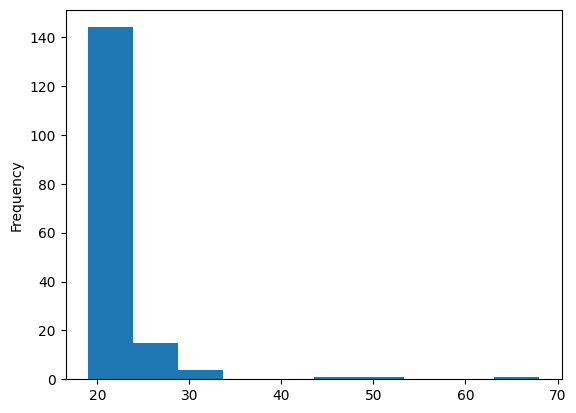

In [65]:
# Data Visualisation, Plotting, matplotlib library ( Heatmap, Piechart, Barplot, Lineplot, (Dotted, dashed)
# scatterplot library, Histogram)
import matplotlib.pyplot as plt

df4['Age'].plot(kind='hist')